In [62]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [63]:
# import tflearn
# from tflearn.data_utils import shuffle, to_categorical
# from tflearn.layers.core import input_data, dropout, fully_connected
# from tflearn.layers.conv import conv_2d, max_pool_2d
# from tflearn.layers.estimator import regression
# from tflearn.data_preprocessing import ImagePreprocessing
# from tflearn.data_augmentation import ImageAugmentation
# import numpy as np

In [64]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# meta = unpickle('/content/drive/My Drive/Colab Notebooks/cifar-100-python/meta')
# train = unpickle('/content/drive/My Drive/Colab Notebooks/cifar-100-python/train')
# test = unpickle('/content/drive/My Drive/Colab Notebooks/cifar-100-python/test')


In [65]:
meta = unpickle('cifar-100-python/meta')
train = unpickle('cifar-100-python/train')
test = unpickle('cifar-100-python/test')



In [66]:
classes = pd.DataFrame(meta[b'fine_label_names'],columns = ['Classes'])


In [67]:
X_train = train[b'data']
y_train = train[b'fine_labels']
X_test = test[b'data']
y_test = test[b'fine_labels']
print(X_train.shape,X_test.shape)

(50000, 3072) (10000, 3072)


In [68]:
X = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X.shape

(50000, 32, 32, 3)

Classes    b'bus'
Name: 13, dtype: object

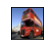

In [69]:
img_num = np.random.randint(0,1000)
plt.figure(figsize=(.6,.6))
plt.xticks([])
plt.yticks([])
plt.imshow(X[img_num])
classes.iloc[train[b'fine_labels'][img_num]]

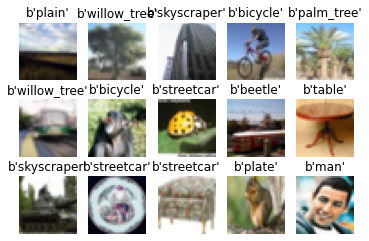

In [70]:
num_images_row = 3
num_images_column = 5
img_nums = np.random.randint(0,len(X),num_images_row*num_images_column)

f, axarr = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(X[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(classes.iloc[train[b'fine_labels'][img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')

## PCA

In [71]:
%%time
pca = PCA(n_components=500)
pca.fit(X_train)
explained_var = pca.explained_variance_ratio_
cum_var_explained = np.cumsum(explained_var)

CPU times: user 3min 32s, sys: 14.3 s, total: 3min 46s
Wall time: 3min 17s


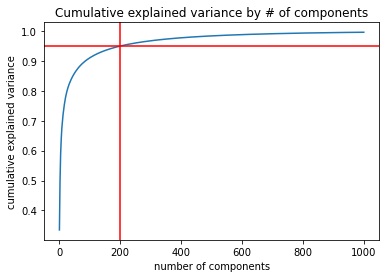

0.9502234726343975


In [33]:
#plot the cumulated variance
plt.plot(range(1,501),cum_var_explained)
plt.axhline(0.95,c='r')
plt.axvline(201,c='r')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Cumulative explained variance by # of components")
plt.show()
print(cum_var_explained[201])

In [35]:
%%time
#Transform the data with pca(n_components = 200)
pca = PCA(n_components=201)

X_train_pca = pca.fit_transform(X_train)
print("Shape of data post PCA:",X_train_pca.shape)

Shape of data post PCA: (50000, 201)
CPU times: user 54.7 s, sys: 2.3 s, total: 57 s
Wall time: 39.9 s


## Split into val and train folds

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X_train_pca, y_train, test_size=0.25, random_state=42) 

In [47]:
print("Training X set shape:",X_train.shape)
print("Training y set shape:",len(y_train))
print("Validation X set shape:",X_val.shape)
print("Validation y set shape:",len(y_val))

Training X set shape: (37500, 201)
Training y set shape: 37500
Validation X set shape: (12500, 201)
Validation y set shape: 12500


# Multi-variate Logistic Regression

In [50]:
%%time
mlr = LogisticRegression().fit(X_train,y_train)

CPU times: user 40.5 s, sys: 2.31 s, total: 42.9 s
Wall time: 29.1 s


In [52]:
%%time
y_pred_mlr = mlr.predict(X_val)
print('Accuracy score', np.mean(y_val == y_pred_mlr))

Accuracy score 0.17328
CPU times: user 40.7 ms, sys: 5.57 ms, total: 46.2 ms
Wall time: 92.4 ms


# Naive-Bayes Gaussian

In [16]:
%%time
gnb = GaussianNB()

CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 37 µs


In [19]:
%%time
NB_pred = gnb.fit(X_train, y_train).predict(X_val)

CPU times: user 2.02 s, sys: 378 ms, total: 2.4 s
Wall time: 2.93 s


In [20]:
print('Accuracy score', np.mean(y_val == NB_pred))

Accuracy score 0.14416


In [54]:
%%time
svc = svm.SVC()
svc.fit(X_train, y_train)

CPU times: user 7min 17s, sys: 3.04 s, total: 7min 20s
Wall time: 7min 40s


SVC()

In [55]:
%%time
y_pred_svm = svc.predict(X_val)
print('Accuracy score', np.mean(y_val == y_pred_svm))

Accuracy score 0.2476
CPU times: user 2min 33s, sys: 973 ms, total: 2min 34s
Wall time: 2min 38s


# Random Forest Classification

In [48]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

CPU times: user 4min 4s, sys: 4.64 s, total: 4min 9s
Wall time: 4min 33s


RandomForestClassifier()

In [49]:
%%time
y_pred_rf = rf.predict(X_val)
print('Accuracy score', np.mean(y_val == y_pred_rf))

Accuracy score 0.18824
CPU times: user 1.88 s, sys: 1.45 s, total: 3.33 s
Wall time: 4.09 s
